In [1]:
import pandas as pd
import bokeh.charts as chart

# Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [2]:
sales = pd.read_csv('./home_data.csv')

In [3]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Exploring the data for housing sales 

The house price is correlated with the number of square feet of living space.


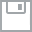
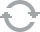
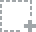
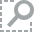
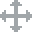
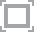
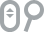
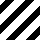
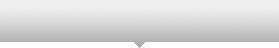
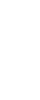
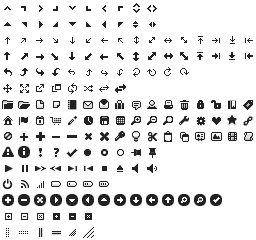
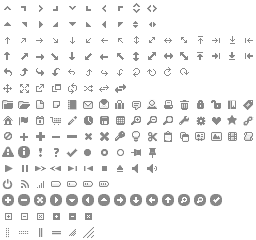
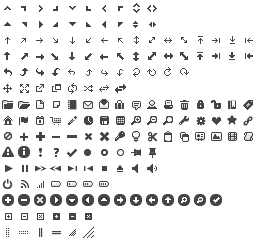
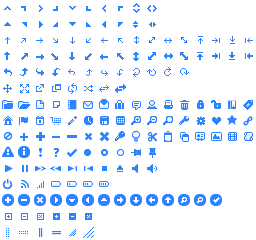
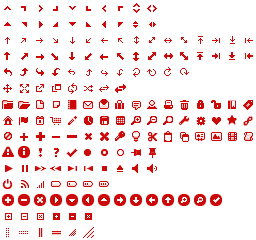
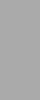
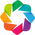
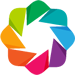

In [4]:
chart.output_notebook()
fig = chart.Scatter(sales, 
            x="sqft_living", 
            y="price", 
            title="Scatter Plot", 
            xlabel="Sq. Footage (ft)",
            ylabel="Price ($)",
            color = 'blue',        
            tools = "pan,wheel_zoom,box_zoom,reset,resize,hover"      
           )
chart.show(fig)

# Create a simple regression model of sqft_living to price

Split data into training and testing.  
We use seed=0 so that everyone running this notebook gets the same results.  In practice, you may set a random seed (or let GraphLab Create pick a random seed for you).  

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
prices = sales['price'].reshape(-1, 1).flatten()

In [7]:
sqft_living = sales['sqft_living'].reshape(-1, 1)

In [8]:
X0_train, X0_test, y0_train, y0_test = train_test_split(sqft_living, 
                                                    prices,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [9]:
sqft_model = LinearRegression()

## Build the regression model using only sqft_living as a feature

In [10]:
sqft_model.fit(X0_train, y0_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Evaluate the simple model

In [11]:
import numpy as np

In [12]:
np.mean(y0_test)

529242.61068702291

In [13]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y0_test, sqft_model.predict(X0_test)))

248879.0614364701

RMSE of about \$255,170!

# Let's show what our predictions look like

Matplotlib is a Python plotting library that is also useful for plotting.  You can install it with:

'pip install matplotlib'

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

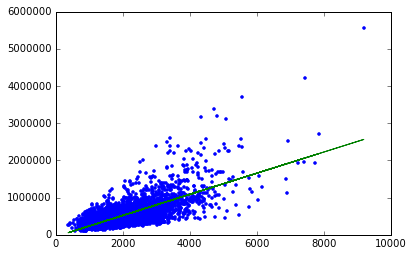

In [15]:
plt.plot(X0_test, 
         y0_test,'.',
         X0_test,
         sqft_model.predict(X0_test),
         '-')

In [16]:
from bokeh.models.sources import ColumnDataSource
import bokeh.plotting as bp
from bokeh.models import *

In [17]:
hover = HoverTool(tooltips = [("index", "$index"), ("(area, price)", "($x, $y)")])
fig = bp.figure(width = 750, 
                height = 400,
                tools = [hover],
                title='Linear Regression')
fig.background_fill = '#3d3d3d'
fig.xaxis.axis_label = 'Footage (sqft)'
fig.yaxis.axis_label = 'Price (million $)'

In [18]:
scale = 1000
fig.circle(X0_test.flatten(), np.true_divide(y0_test, scale), color='yellow')
fig.line(X0_test.flatten(), np.true_divide(sqft_model.predict(X0_test), scale), color='red')
bp.show(fig)

Above:  blue dots are original data, green line is the prediction from the simple regression.

Below: we can view the learned regression coefficients. 

In [19]:
print "intercept = ", sqft_model.intercept_, "\nsqft_living = ", sqft_model.coef_

intercept =  -48257.0634556 
sqft_living =  [ 283.96855737]


# Explore other features in the data

To build a more elaborate model, we will explore using more features.

In [20]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [21]:
X = sales[my_features]

In [25]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
0,3,1.00,1180,5650,1,98178
1,3,2.25,2570,7242,2,98125
2,2,1.00,770,10000,1,98028
3,4,3.00,1960,5000,1,98136
4,3,2.00,1680,8080,1,98074


In [24]:
bplot = chart.BoxPlot(sales, values = 'price', label='zipcode', tools="hover,pan,box_zoom")
chart.show(bplot)

Pull the bar at the bottom to view more of the data.  

98039 is the most expensive zip code.

# Build a regression model with more features

In [26]:
my_features_model = LinearRegression()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    prices, 
                                                    test_size = 0.2,
                                                    random_state = 0)

In [28]:
my_features_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Comparing the results of the simple model with adding more features

In [29]:
print np.sqrt(mean_squared_error(y0_test, sqft_model.predict(X0_test)))
print np.sqrt(mean_squared_error(y_test, my_features_model.predict(X_test)))

248879.061436
244004.774431


The RMSE goes down from \$255,170 to \$179,508 with more features.

# Apply learned models to predict prices of 3 houses

The first house we will use is considered an "average" house in Seattle. 

In [35]:
house1 = sales[sales['id'] == 5309101200]

In [36]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


<img src="http://info.kingcounty.gov/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [53]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


In [54]:
print sqft_model.predict(house1[house1.columns].values)

ValueError: invalid literal for float(): 20140605T000000

In [ ]:
print my_features_model.predict(house1)

In this case, the model with more features provides a worse prediction than the simpler model with only 1 feature.  However, on average, the model with more features is better.

##Prediction for a second, fancier house

We will now examine the predictions for a fancier house.

In [ ]:
house2 = sales[sales['id']=='1925069082']

In [ ]:
house2

<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [ ]:
print sqft_model.predict(house2)

In [ ]:
print my_features_model.predict(house2)

In this case, the model with more features provides a better prediction.  This behavior is expected here, because this house is more differentiated by features that go beyond its square feet of living space, especially the fact that it's a waterfront house. 

##Last house, super fancy

Our last house is a very large one owned by a famous Seattleite.

In [ ]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Bill_gates%27_house.jpg/2560px-Bill_gates%27_house.jpg">

In [ ]:
print my_features_model.predict(graphlab.SFrame(bill_gates))

The model predicts a price of over $13M for this house! But we expect the house to cost much more.  (There are very few samples in the dataset of houses that are this fancy, so we don't expect the model to capture a perfect prediction here.)